In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load and prepare mnist dataset
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0


In [3]:
#bulding tf.keras.models.Sequential model by adding layers
#the 1st line indicates the number of neurons in input layer (28*28=784)
#2nd line indicates the number of neurons in hidden layer (128)
#the last line indicates number of neurons the output layer (10)
#finally choose an optimizer and loss function for training
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
#train the model
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2999 - accuracy: 0.9128
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1426 - accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1079 - accuracy: 0.9675
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0894 - accuracy: 0.9722
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0750 - accuracy: 0.9765


In [5]:
#evaluate the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0710 - accuracy: 0.9773


[0.07103572325427085, 0.9773]

1


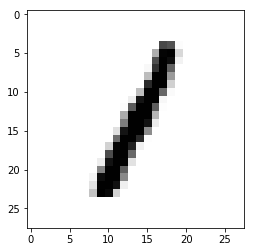

In [6]:
#choose any image index from 0 to 60000
#predict using our model
image_index = 8768
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28))
print(pred.argmax())